Detecting the ridge and the blob of the images

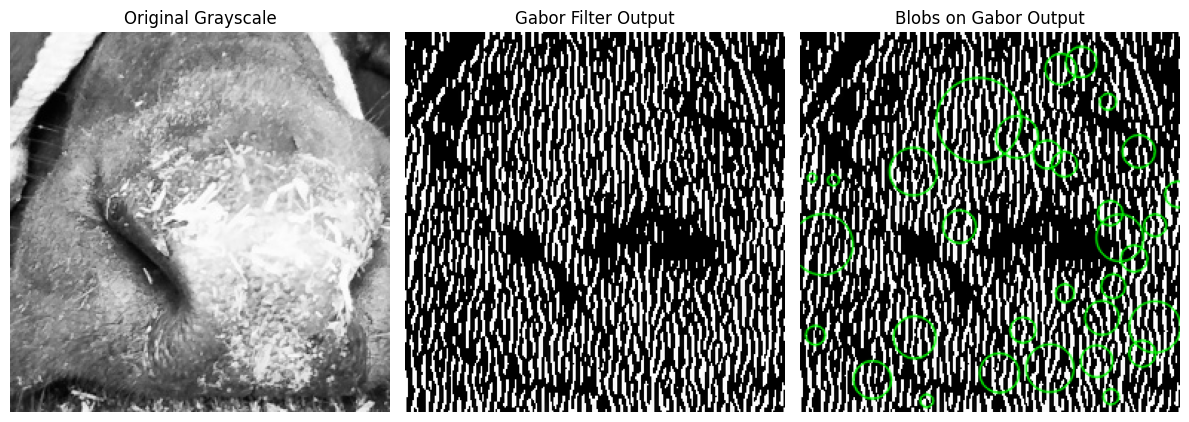

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
import os

# === Configuration ===
image_folder = r"D:\Abhishek\base_256\cattle-001"
image_name = "IMG20230723072804.jpg"  # update with a test image
image_path = os.path.join(image_folder, image_name)
# ======================

# Load image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Apply Gabor filter
frequency = 0.2  # You can tune this
gabor_res, gabor_phase = gabor(img, frequency=frequency)

# Normalize Gabor result for visualization
gabor_img = (gabor_res * 255).astype(np.uint8)

# Set up blob detector
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 5
params.maxArea = 300
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(gabor_img)

# Draw keypoints on the image
blob_vis = cv2.drawKeypoints(gabor_img, keypoints, None, (0, 255, 0),
                             flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# === Plot all results ===
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gabor Filter Output")
plt.imshow(gabor_img, cmap='gray')
plt.axis('off')
        
plt.subplot(1, 3, 3)
plt.title("Blobs on Gabor Output")
plt.imshow(blob_vis[..., ::-1])  # convert BGR to RGB
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import os
print(os.path.exists(r"D:\Abhishek\base_256"))  # Should return True
print(os.listdir(r"D:\Abhishek\base_256"))      # Should list subfolders if accessible


True
['cattle-001', 'cattle-002', 'cattle-003', 'cattle-004', 'cattle-005', 'cattle-006', 'cattle-007', 'cattle-008', 'cattle-009', 'cattle-010', 'cattle-011', 'cattle-012', 'cattle-013', 'cattle-014', 'cattle-015', 'cattle-016', 'cattle-017', 'cattle-018', 'cattle-019', 'cattle-020', 'cattle-021', 'cattle-022', 'cattle-023', 'cattle-024', 'cattle-025', 'cattle-026', 'cattle-027', 'cattle-028', 'cattle-029', 'cattle-030', 'cattle-031', 'cattle-032', 'cattle-033', 'cattle-034', 'cattle-035', 'cattle-036', 'cattle-037', 'cattle-038', 'cattle-039', 'cattle-040', 'cattle-041', 'cattle-042', 'cattle-043', 'cattle-044', 'cattle-045', 'cattle-046', 'cattle-047', 'cattle-048', 'cattle-049', 'cattle-050', 'cattle-051', 'cattle-052', 'cattle-053', 'cattle-054', 'cattle-055', 'cattle-056', 'cattle-057', 'cattle-058', 'cattle-059', 'cattle-060', 'cattle-061', 'cattle-062', 'cattle-063', 'cattle-064', 'cattle-065', 'cattle-066', 'cattle-067', 'cattle-068', 'cattle-069', 'cattle-070', 'cattle-071', 

Extract the feature of the muzzle and save the features like the number of blob,mean intensity and std intensity 

In [4]:
import cv2
import numpy as np
import os
import pandas as pd
from skimage.filters import gabor
from tqdm import tqdm

# === CONFIGURATION ===
base_path = r"D:\Abhishek\base_256"
output_csv = r"D:\Abhishek\muzzle_features.csv"
frequency = 0.2  # Gabor filter frequency
# =====================

# Configure blob detector
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 5
params.maxArea = 300
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
detector = cv2.SimpleBlobDetector_create(params)

features = []

# Loop through each cattle folder
for cattle_id in tqdm(os.listdir(base_path)):
    cattle_dir = os.path.join(base_path, cattle_id)
    if not os.path.isdir(cattle_dir):
        continue

    for img_name in os.listdir(cattle_dir):
        img_path = os.path.join(cattle_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        # Gabor filtering
        gabor_mag, _ = gabor(img, frequency=frequency)
        gabor_img = (gabor_mag * 255).astype(np.uint8)

        # Blob detection
        keypoints = detector.detect(gabor_img)
        num_blobs = len(keypoints)

        # Extract additional features
        mean_intensity = np.mean(gabor_img)
        std_intensity = np.std(gabor_img)

        # Save feature row
        features.append({
            "cattle_id": cattle_id,
            "image_name": img_name,
            "num_blobs": num_blobs,
            "mean_intensity": mean_intensity,
            "std_intensity": std_intensity
        })

# Save all features to CSV
df = pd.DataFrame(features)
df.to_csv(output_csv, index=False)

print(f"✅ Feature extraction complete. Saved to: {output_csv}")


100%|██████████| 455/455 [02:04<00:00,  3.66it/s]

✅ Feature extraction complete. Saved to: D:\Abhishek\muzzle_features.csv
